In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
colums_names=[
    "engine_id","cycle",
    "op_setting_1","op_setting_2","op_setting_3"
]+[f"Sensor_{i}" for i in range(1,22)]

In [3]:
df = pd.read_csv("../../data_set/train_FD001.txt",
                sep='\s+',
                header=None,
                names=colums_names)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\saromiya\AppData\Local\Temp\ipykernel_17268\1664473354.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


In [4]:
df.head()

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
df.shape

(20631, 26)

In [6]:
# Engine and cycle range
print("Unique engine:",df["engine_id"].nunique())
print("cycle range:{}-{} ".format(df['cycle'].min(),df['cycle'].max()))

Unique engine: 100
cycle range:1-362 


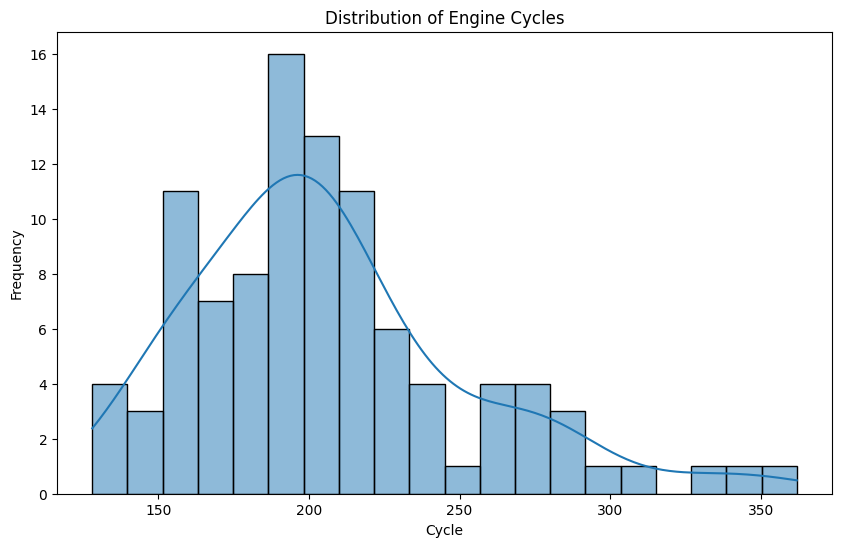

In [7]:
cycle_counts=df.groupby('engine_id')['cycle'].max()
plt.figure(figsize=(10,6))
sns.histplot(cycle_counts,bins=20,kde=True)
plt.title("Distribution of Engine Cycles")
plt.xlabel("Cycle")
plt.ylabel("Frequency")
plt.show()

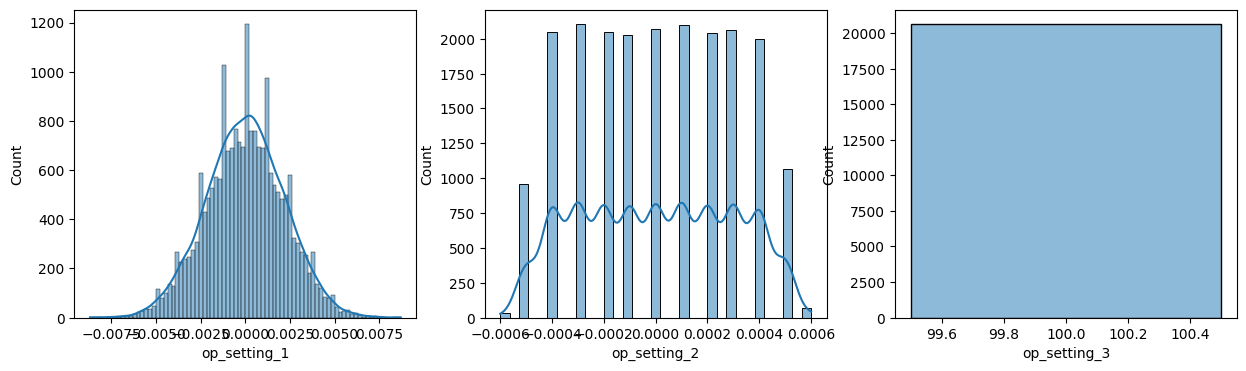

In [8]:
op_settings=['op_setting_1','op_setting_2','op_setting_3']
fig,axs=plt.subplots(1,3,figsize=(15,4))
for idx , col in enumerate(op_settings):
  sns.histplot(df[col],kde=True,ax=axs[idx])
  axs[idx].set_xlabel(col)
plt.show()

In [9]:
sensor_cols = [col for col in df.columns if 'sensor' in col]
plt.figure(figsize=(16, 8))
for i,col in enumerate(sensor_cols[:10],1):
    plt.subplot(2,5,i)
    sns.histplot(df[col],bins=30,kde=True,color='skyblue')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

C:\Users\saromiya\AppData\Local\Temp\ipykernel_17268\1685349678.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


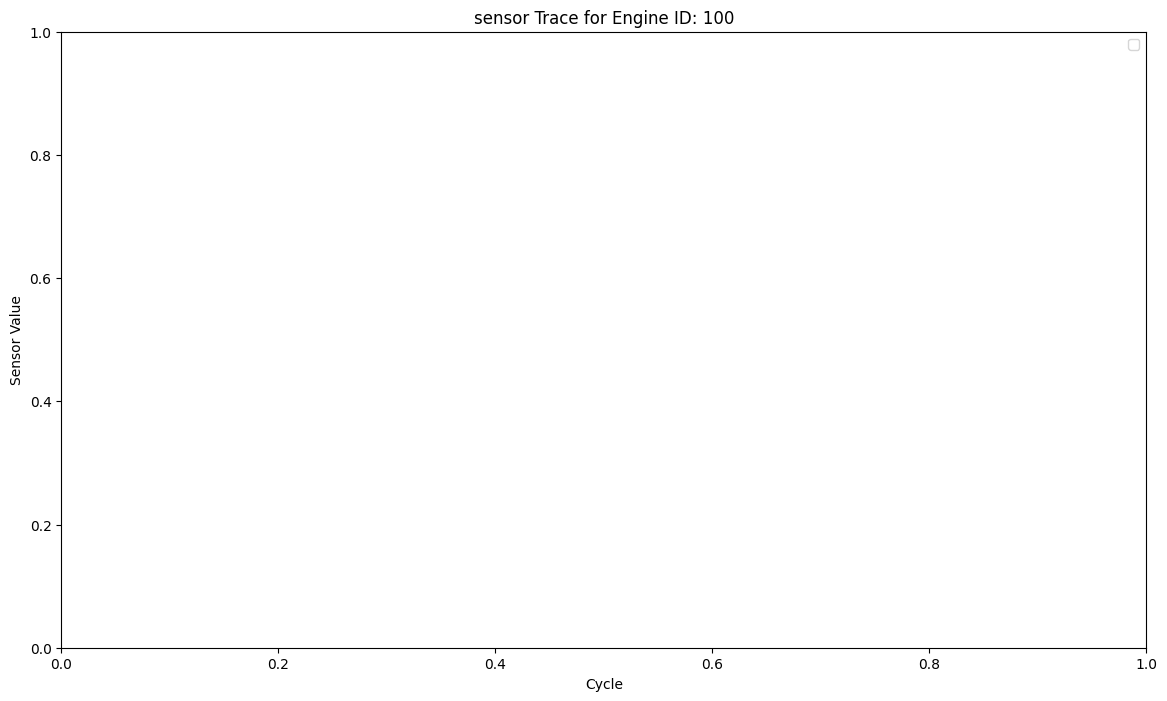

In [18]:
engine_id = np.random.choice(df['engine_id'].unique())
sample = df[df['engine_id'] == engine_id]
plt.figure(figsize=(14,8))
for col in sensor_cols[:5]:
  plt.plot(sample['cycle'],sample[col],label=col)
plt.title(f"sensor Trace for Engine ID: {engine_id}")
plt.xlabel("Cycle")
plt.ylabel("Sensor Value")
plt.legend()
plt.show()

In [16]:
sensor_cols = [col for col in df.columns if "sensor_" in col]

plt.figure(figsize=(15, 10))
for i, col in enumerate(sensor_cols[:10], 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.ylabel("Value")
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

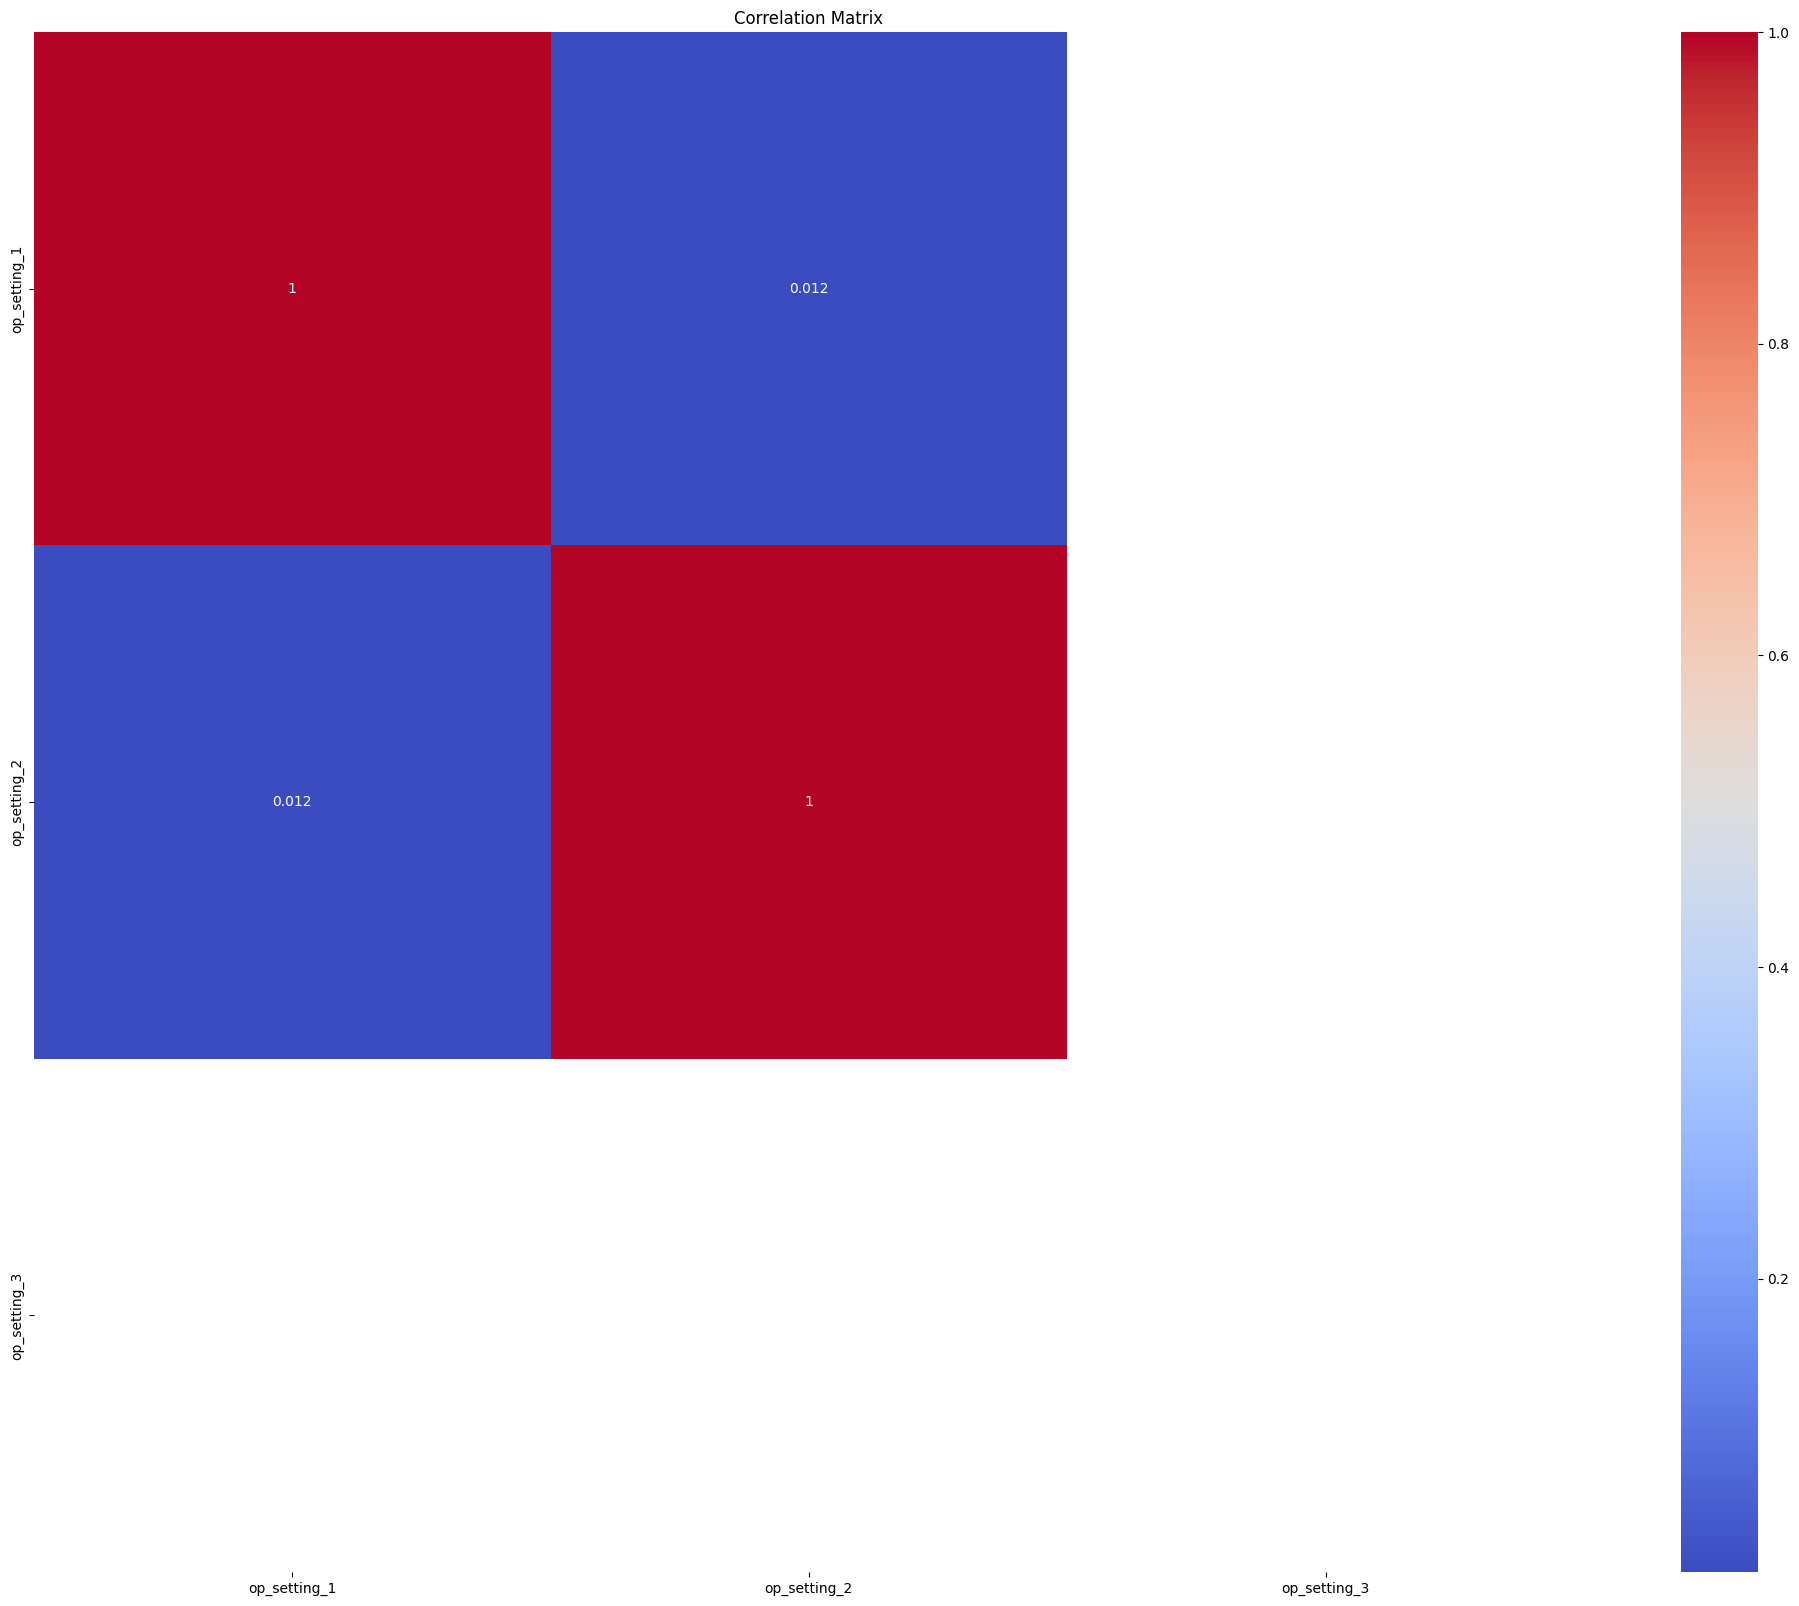

In [17]:
plt.figure(figsize=(25, 20))
sns.heatmap(df[op_settings + sensor_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
